In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from tqdm import trange
import pymc3 as pm
import theano
import theano.tensor as tt


%matplotlib inline

<img src="https://cdn.mathpix.com/snip/images/WTuNW8HreMYZDdZBvWGW1rW9nSD4COOjsfjqS6Xq3aY.original.fullsize.png" />

In [394]:


z4 =[
"-22.69,0.000003,0.000004",
"-22.19,0.000015,0.000009",
"-21.69,0.000134,0.000023",
"-21.19,0.000393,0.000040",
"-20.69,0.000678,0.000063",
"-20.19,0.001696,0.000113",
"-19.69,0.002475,0.000185",
"-19.19,0.002984,0.000255",
"-18.69,0.005352,0.000446",
"-18.19,0.006865,0.001043",
"-17.69,0.010473,0.002229",
"-16.94,0.024580,0.003500",
"-15.94,0.025080,0.007860"]



z5 = [
"-23.11,0.000002,0.000002",
"-22.61,0.000006,0.000003",
"-22.11,0.000034,0.000008",
"-21.61,0.000101,0.000014",
"-21.11,0.000265,0.000025",
"-20.61,0.000676,0.000046",
"-20.11,0.001029,0.000067",
"-19.61,0.001329,0.000094",
"-19.11,0.002085,0.000171",
"-18.36,0.004460,0.000540",
"-17.36,0.008600,0.001760",
"-16.36,0.024400,0.007160",
]

z6 = [
"-22.52,0.000002,0.000002",
"-22.02,0.000015,0.000006",
"-21.52,0.000053,0.000012",
"-21.02,0.000176,0.000025",
"-20.52,0.000320,0.000041",
"-20.02,0.000698,0.000083",
"-19.52,0.001246,0.000137",
"-18.77,0.001900,0.000320",
"-17.77,0.006680,0.001380",
"-16.77,0.013640,0.004200"
]

w = open('Bouwens 2015/bowensz4.csv','w')
for l in z4:
    w.write(l+'\n')
w.close()

w = open('Bouwens 2015/bowensz5.csv','w')
for l in z5:
    w.write(l+'\n')
w.close()

w = open('Bouwens 2015/bowensz6.csv','w')
for l in z6:
    w.write(l+'\n')
w.close()

bw_z4 = pd.read_csv("Bouwens 2015/bowensz4.csv", names=['M','phi','err_phi']) 
bw_z4['Mass'] = np.log10(120 * np.power(10,-0.4 * (bw_z4.M.values - 4.62)))
bw_z5 = pd.read_csv("Bouwens 2015/bowensz5.csv", names=['M','phi','err_phi']) 
bw_z5['Mass'] = np.log10(120 * np.power(10,-0.4 * (bw_z5.M.values - 4.62)))
bw_z6 = pd.read_csv("Bouwens 2015/bowensz6.csv", names=['M','phi','err_phi']) 
bw_z6['Mass'] = np.log10(120 * np.power(10,-0.4 * (bw_z6.M.values - 4.62)))

In [397]:
hmf_z4=pd.read_csv("umachine-dr1/data/hmfs/hmf_a0.202435.dat", skiprows=2,sep="\s")

hmf_z5=pd.read_csv("umachine-dr1/data/hmfs/hmf_a0.166998.dat", skiprows=2,sep="\s")

hmf_z6=pd.read_csv("umachine-dr1/data/hmfs/hmf_a0.141685.dat", skiprows=2,sep="\s")

uvsm_z4=pd.read_csv("umachine-dr1/data/uvsm/uvsm_z3.5-z4.5.dat", skiprows=3,sep="\s")

uvsm_z5=pd.read_csv("umachine-dr1/data/uvsm/uvsm_z4.5-z5.5.dat", skiprows=3,sep="\s")

uvsm_z6=pd.read_csv("umachine-dr1/data/uvsm/uvsm_z5.5-z6.5.dat", skiprows=3,sep="\s")

/Users/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/Users/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are inte

In [402]:
uvsm_z4

,#UV_Center,Median_SM,Err+,Err-,UV_Min,UV_Max
0,-23.75,2.645710e+11,1.010890e+11,8.327530e+10,-24.0,-23.5
1,-23.25,1.447760e+11,2.718590e+10,4.360790e+10,-23.5,-23.0
2,-22.75,8.031020e+10,9.450800e+09,2.238510e+10,-23.0,-22.5
3,-22.25,4.146550e+10,2.588320e+09,1.057430e+10,-22.5,-22.0
4,-21.75,1.897540e+10,1.272490e+09,4.539430e+09,-22.0,-21.5
5,-21.25,8.371810e+09,7.346360e+08,1.408040e+09,-21.5,-21.0
6,-20.75,4.038910e+09,4.939580e+08,6.151670e+08,-21.0,-20.5
7,-20.25,2.099030e+09,3.425160e+08,2.709780e+08,-20.5,-20.0
8,-19.75,1.153130e+09,2.226250e+08,1.395580e+08,-20.0,-19.5
9,-19.25,6.674500e+08,1.408660e+08,7.815730e+07,-19.5,-19.0


In [432]:

def conv_uvsm(z):
    if z>=3.5 and z<4.5:
        uvsm = uvsm_z4
        bw = bw_z4.copy()
        
    elif z>=4.5 and z<5.5:
        uvsm = uvsm_z5
        bw = bw_z5.copy()
    elif z>=5.5 and z<6.5:
        uvsm = uvsm_z6
        bw = bw_z6.copy()
    else:
        return pd.DataFrame({})
    
    f = interp1d(uvsm['#UV_Center'].values,uvsm['Median_SM'].values)
    f_B = interp1d(uvsm['#UV_Center'].values,uvsm['Median_SM'].values + uvsm['Err+'].values)
    f_b = interp1d(uvsm['#UV_Center'].values,uvsm['Median_SM'].values - uvsm['Err-'].values)
    bw['#UV_Center'] = bw.M - bw.M % 0.25
    bw = pd.merge(bw,uvsm, on="#UV_Center")
    
    bw['SM'] = f(bw.M.values)
    bw['SM_B'] = f_B(bw.M.values)
    bw['SM_b'] = f_b(bw.M.values)
    bw['Mh'] = np.log10(bw['SM'] * 70)
    bw['Mh_B'] = np.log10(bw['SM_B'] * 70)
    bw['Mh_b'] = np.log10(bw['SM_b'] * 70)
    bw['Median_Mh'] = np.log10(bw['Median_SM'] * 70)
    
    return bw

In [369]:
archivos = ["HMFCalc/Seth_WMAP7/mVector_z=4 .txt","HMFCalc/Seth_WMAP7/mVector_z=5 .txt",
           "HMFCalc/Seth_WMAP7/mVector_z=6 .txt","HMFCalc/Seth_WMAP7/mVector_z=7 .txt",
           "HMFCalc/Seth_WMAP7/mVector_z=8 .txt"]
'''
archivos2 = ["HMFCalc/Seth_Planck/mVector_PLANCK-SMT z4 .txt","HMFCalc/Seth_Planck/mVector_PLANCK-SMT z5 .txt",
           "HMFCalc/Seth_Planck/mVector_PLANCK-SMT z6 .txt","HMFCalc/Seth_Planck/mVector_PLANCK-SMT z7 .txt",
           "HMFCalc/Seth_Planck/mVector_PLANCK-SMT z8 .txt"]
'''
archivos2 = ["HMFCalc/Beh-Planck/mVector_PLANCK- z = 4 .txt","HMFCalc/Beh-Planck/mVector_PLANCK- z = 5 .txt",
           "HMFCalc/Beh-Planck/mVector_PLANCK- z = 6 .txt","HMFCalc/Beh-Planck/mVector_PLANCK- z = 7 .txt",
           "HMFCalc/Beh-Planck/mVector_PLANCK- z = 8 .txt"]
hmfcalc_list=[]
hmfcalc_list2=[]

for i in range(3):
    a = archivos[i]
    hmfcalc_z=pd.read_csv(a,sep="\s",header=None, skiprows=12)
    hmfcalc_z = hmfcalc_z.iloc[:,[0,7,11]]
    hmfcalc_z=hmfcalc_z.rename(columns={0:"M_h",7:"dn/dlog10m",11:"Lbox"})
    hmfcalc_z["M_h"]=np.log10(hmfcalc_z["M_h"].values)
    hmfcalc_list.append(hmfcalc_z)
    
    a = archivos2[i]
    hmfcalc_z=pd.read_csv(a,sep="\s",header=None, skiprows=12)
    hmfcalc_z = hmfcalc_z.iloc[:,[0,7,11]]
    hmfcalc_z=hmfcalc_z.rename(columns={0:"M_h",7:"dn/dlog10m",11:"Lbox"})
    hmfcalc_z["M_h"]=np.log10(hmfcalc_z["M_h"].values)
    hmfcalc_list2.append(hmfcalc_z)

/Users/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/Users/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


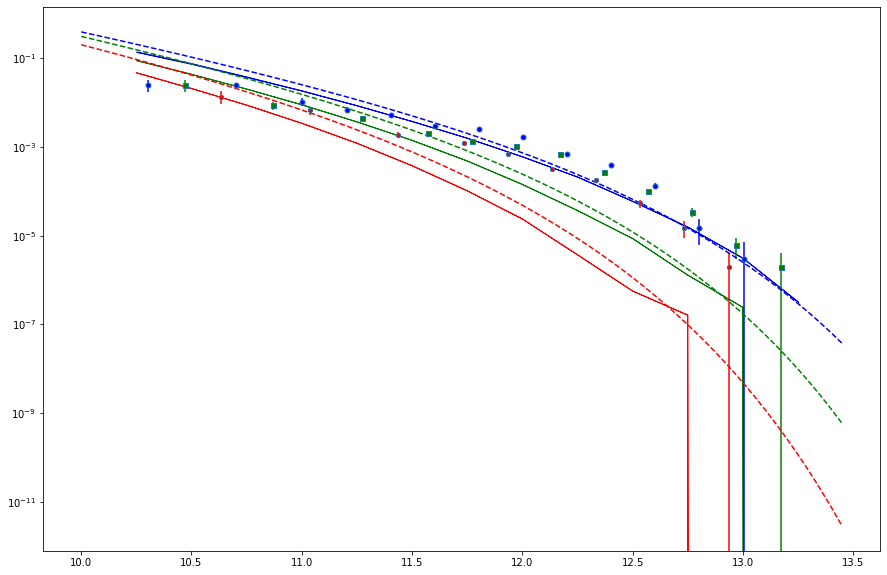

In [390]:
plt.figure(figsize=(15,10))
plt.errorbar(bw_z4.Mass,bw_z4.phi, bw_z4.err_phi,marker='o',ms=5, mfc='b',ecolor="b",linestyle="")
plt.errorbar(bw_z5.Mass,bw_z5.phi, bw_z5.err_phi,marker='s',ms=5, mfc='g',ecolor="g",linestyle="")
plt.errorbar(bw_z6.Mass,bw_z6.phi, bw_z6.err_phi,marker='8',ms=5, mfc='r',ecolor="r",linestyle="")
color = ['b','g','r']
color2 = ['b--','g--','r--']
hmf_um = [hmf_z4,hmf_z5,hmf_z6]
for i in range(3):
    
    h = hmfcalc_list[i]
    x = h.M_h.values[h.M_h.values<13.5]
    y = h['dn/dlog10m'].values[h.M_h.values<13.5]
    plt.plot(x,y, color2[i])
    
    
    h = hmf_um[i]
    mask = (h['#Log10(HM)'].values<13.5) & (h['#Log10(HM)'].values>10)
    x = h['#Log10(HM)'].values[mask]
    y = h['Number_Density'].values[mask]
    ub = h['Number_Density'].values[mask] + h['Err+'].values[mask]
    db = h['Number_Density'].values[mask]+ h['Err-'].values[mask]
    #plt.plot(x,y, color[i])
    
    plt.fill_between(x,db,ub, color=color[i])

#plt.plot(bw_z4.M, A * p_est * (10**(-0.4*(M-m_est)*(a_est+1))) - np.exp(10**(-0.4*(M-m_est))),'r-')
plt.yscale('log')

In [433]:


bz4

,M,phi,err_phi,Mass,#UV_Center,Median_SM,Err+,Err-,UV_Min,UV_Max,SM,SM_B,SM_b,Mh,Mh_B,Mh_b,Median_Mh
0,-22.69,0.000003,0.000004,13.003181,-22.75,8.031020e+10,9.450800e+09,2.238510e+10,-23.0,-22.5,7.564884e+10,8.427614e+10,5.468103e+10,12.723900,12.770803,12.582935,12.749869
1,-22.19,0.000015,0.000009,12.803181,-22.25,4.146550e+10,2.588320e+09,1.057430e+10,-22.5,-22.0,3.876669e+10,4.119711e+10,2.891657e+10,12.433557,12.459965,12.306245,12.462785
2,-21.69,0.000134,0.000023,12.603181,-21.75,1.897540e+10,1.272490e+09,4.539430e+09,-22.0,-21.5,1.770297e+10,1.891092e+10,1.353931e+10,12.093144,12.121811,11.976694,12.123289
3,-21.19,0.000393,0.000040,12.403181,-21.25,8.371810e+09,7.346360e+08,1.408040e+09,-21.5,-21.0,7.851862e+09,8.557617e+09,6.538967e+09,11.740071,11.777451,11.660607,11.767917
4,-20.69,0.000678,0.000063,12.203181,-20.75,4.038910e+09,4.939580e+08,6.151670e+08,-21.0,-20.5,3.806124e+09,4.281909e+09,3.232260e+09,11.425581,11.476736,11.354604,11.451362
5,-20.19,0.001696,0.000113,12.003181,-20.25,2.099030e+09,3.425160e+08,2.709780e+08,-20.5,-20.0,1.985522e+09,2.313651e+09,1.730314e+09,11.142973,11.209396,11.083223,11.167117
6,-19.69,0.002475,0.000185,11.803181,-19.75,1.153130e+09,2.226250e+08,1.395580e+08,-20.0,-19.5,1.094848e+09,1.307662e+09,9.626585e+08,10.884452,10.961594,10.828570,10.906976
7,-19.19,0.002984,0.000255,11.603181,-19.25,6.674500e+08,1.408660e+08,7.815730e+07,-19.5,-19.0,6.353739e+08,7.705275e+08,5.612967e+08,10.648127,10.731886,10.594291,10.669517
8,-18.69,0.005352,0.000446,11.403181,-18.75,4.001490e+08,9.326320e+07,4.415600e+07,-19.0,-18.5,3.816240e+08,4.708777e+08,3.396439e+08,10.426734,10.518006,10.376122,10.447320
9,-18.19,0.006865,0.001043,11.203181,-18.25,2.457740e+08,5.985040e+07,2.602390e+07,-18.5,-18.0,2.347245e+08,2.920038e+08,2.098958e+08,10.215656,10.310487,10.167102,10.235634


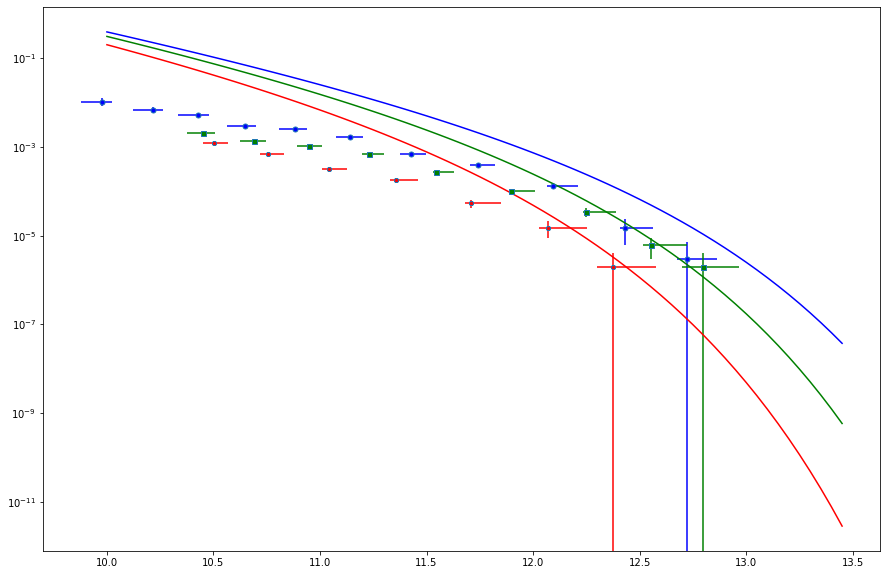

In [439]:
plt.figure(figsize=(15,10))

plt.errorbar(bz4.Mh,bz4.phi, xerr=[bz4.Mh_B-bz4.Mh, bz4.Mh-bz4.Mh_b] ,yerr=bz4.err_phi,marker='o',ms=5, mfc='b',ecolor="b",linestyle="")
plt.errorbar(bz5.Mh,bz5.phi, xerr=[bz5.Mh_B-bz5.Mh, bz5.Mh-bz5.Mh_b] ,yerr=bz5.err_phi,marker='s',ms=5, mfc='g',ecolor="g",linestyle="")
plt.errorbar(bz6.Mh,bz6.phi, xerr=[bz6.Mh_B-bz6.Mh, bz6.Mh-bz6.Mh_b] ,yerr=bz6.err_phi,marker='8',ms=5, mfc='r',ecolor="r",linestyle="")
color = ['b','g','r']
color2 = ['b--','g--','r--']
hmf_um = [hmf_z4,hmf_z5,hmf_z6]
for i in range(3):
    h = hmfcalc_list[i]
    x = h.M_h.values[h.M_h.values<13.5]
    y = h['dn/dlog10m'].values[h.M_h.values<13.5]
    plt.plot(x,y, color[i])
    '''
    h = hmf_um[i]
    mask = (h['#Log10(HM)'].values<13.5) & (h['#Log10(HM)'].values>10)
    x = h['#Log10(HM)'].values[mask]
    y = h['Number_Density'].values[mask]
    ub = h['Number_Density'].values[mask] + h['Err+'].values[mask]
    db = h['Number_Density'].values[mask]+ h['Err-'].values[mask]
    #plt.plot(x,y, color[i])
    
    plt.fill_between(x,db,ub, color=color[i])
    '''
#plt.plot(bw_z4.M, A * p_est * (10**(-0.4*(M-m_est)*(a_est+1))) - np.exp(10**(-0.4*(M-m_est))),'r-')
plt.yscale('log')

$$
\varphi(L)=\varphi^{*} \left(\frac{L}{L^*}\right)^{\alpha} e^{-\frac{L}{L^*}}
$$

$$
\frac{L}{L^*} = 10^{-0.4\cdot(M-M^*)}
$$

$$
\varphi(M)=0.4 \ln (10) \varphi^{*} 10^{-0.4\left(M-M^{*}\right)(\alpha+1)} e^{-10^{-0.4\left(M-M^{*}\right)}}
$$

$$
\log_{10} \varphi(M) = \log_{10}(10 \cdot 0.4) + \varphi_{10}^* - 0.4(M-M^*)(\alpha+1) - 10^{-0.4\left(M-M^{*}\right)}\log_{10}(e)
$$



In [37]:
def phi(M,m,a,p):
    part1=0.4*np.log(10)
    paw1= -0.4*(M-m)*(a+1)
    paw2= -np.power(10,-0.4*(M-m))
    part2=np.power(10,paw1)
    part3=np.exp(paw2)
    
    phi_value = part1*part2*part3*p
    
    return phi_value

In [341]:
M = bw_z4.M.values
data = bw_z4.phi.values
error = bw_z4.err_phi.values
A = 0.4 * np.log(10)
E = np.log10(np.exp(1))

with pm.Model() as model:
    a = pm.Uniform('a', -5,0)
    m = pm.Uniform('m', -50,0)
    p = pm.Uniform('p', 0,2)
    
    p_obs = A * p * (10**(-0.4*(M-m)*(a+1))) - np.exp(10**(-0.4*(M-m)))
    y = pm.Normal('y', mu=p_obs, sigma=error, observed=data)
    trace = pm.sample(5000,chains=2,nuts_kwargs={'target_accept': 0.95})
    pm.traceplot(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [p, m, a]
Sampling 2 chains, 0 divergences:   2%|▏         | 224/11000 [00:00<00:29, 362.95draws/s] 


RuntimeError: Chain 0 failed.

In [342]:
a_est = np.median(trace.get_values('a'))
m_est = np.median(trace.get_values('m'))
p_est = np.median(trace.get_values('p'))

a_est, m_est, p_est

(-0.984881203251621, -27.94717927933555, 29.639208358314153)

## Example PyMC3

In [75]:
true_mu = 0.1
data = true_mu + np.random.randn(100)

with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=1)
    y = pm.Normal('y', mu=mu, sigma=1, observed=data)

In [76]:
with model:
    trace = pm.sample(5000, cores=4, nuts_kwargs={'target_accept': 0.95})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]
Sampling 4 chains, 0 divergences: 100%|██████████| 22000/22000 [00:06<00:00, 3544.64draws/s]


In [77]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,0.166,0.1,-0.017,0.357,0.001,0.001,6606.0,6606.0,6608.0,6952.0,1.0


#### Auto Ejemplo

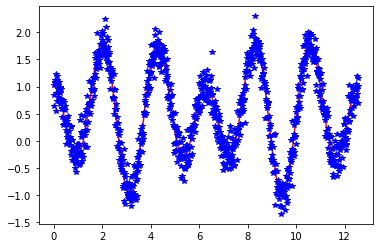

In [245]:
x = np.arange(0,4 * np.pi,4 * np.pi / 1000)
y_true = np.sin(x)**2 + np.cos(3*x)
y = y_true + np.random.normal(0,.2,y_true.shape[0])

plt.plot(x,y_true,'r-')
plt.plot(x,y,'b*')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b]
Sampling 4 chains, 0 divergences: 100%|██████████| 22000/22000 [00:07<00:00, 2866.17draws/s]
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
100%|██████████| 20000/20000 [00:21<00:00, 940.58it/s]
/Users/santi/anaconda3/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
b,3.311,0.311,2.998,3.624,0.155,0.119,4.0,4.0,6.0,121.0,1.73


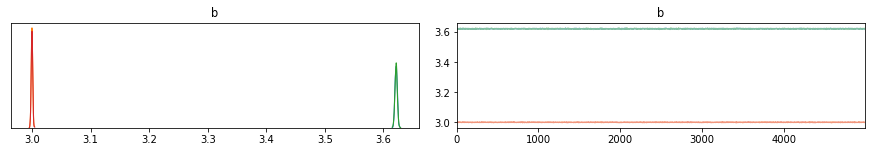

In [246]:
with pm.Model() as model:
    b = pm.Uniform('b',0,10)
    
    mu = tt.pow(tt.sin(x), 2) + tt.cos(b*x)
    y_obs = pm.Normal('y_obs', mu=mu, sigma=.2, observed=y)
    trace = pm.sample(5000,chains=4,nuts_kwargs={'target_accept': 0.95})
    posterior_pred = pm.sample_posterior_predictive(trace)
    
pm.traceplot(trace)
pm.summary(trace)

In [267]:
b_B = np.quantile(trace.get_values('b'),0.975)
b_b = np.quantile(trace.get_values('b'),0.025)
b_est = np.median(trace.get_values('b'))
y_est = np.sin(x)**2 + np.cos(b_est*x)
Y_err = np.zeros((y_est.size,2)) 
Y_err[:,0] = np.sin(x)**2 + np.cos(b_B*x)
Y_err[:,1] = np.sin(x)**2 + np.cos(b_b*x)

y_B = Y_err.max(axis=1)
y_b = Y_err.min(axis=1)

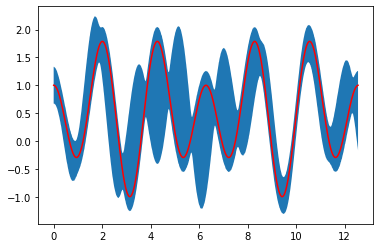

In [272]:
plt.plot(x,y_true,'r-')
#plt.plot(x,np.median(posterior_pred['y_obs'],axis=0),'g:')

#plt.fill_between(x,y_B,y_b)
plt.fill_between(x,np.quantile(posterior_pred['y_obs'],0.95, axis=0),
                   np.quantile(posterior_pred['y_obs'],0.05, axis=0))

In [269]:
np.quantile(posterior_pred['y_obs'],0.975, axis=0)

array([ 1.39123329,  1.3901943 ,  1.39067874,  1.38729872,  1.37913856,
        1.37416981,  1.37043618,  1.35541047,  1.3428349 ,  1.33523911,
        1.32496154,  1.31499629,  1.29421402,  1.27745908,  1.26150083,
        1.24199032,  1.22500624,  1.20472037,  1.18806526,  1.16485028,
        1.14605547,  1.12116568,  1.09256649,  1.07112021,  1.04653998,
        1.02006044,  0.99515131,  0.97412456,  0.95405727,  0.92419756,
        0.8932244 ,  0.86960365,  0.84283555,  0.80741478,  0.79392842,
        0.7639508 ,  0.73559183,  0.70422894,  0.68809588,  0.65864188,
        0.62999221,  0.59786007,  0.57115362,  0.54137226,  0.51159477,
        0.49132565,  0.4650325 ,  0.43296324,  0.41220827,  0.38788496,
        0.37106398,  0.34371099,  0.31605837,  0.29900228,  0.26364376,
        0.25113296,  0.23837389,  0.2073169 ,  0.1978874 ,  0.18426781,
        0.15523884,  0.13812891,  0.12914665,  0.11487804,  0.10950089,
        0.09752685,  0.08354924,  0.08405021,  0.06813474,  0.08

In [234]:
k = posterior_pred['y_obs']
k,axis=0)

array([ 0.9968488 ,  0.87686251,  0.62147191,  0.30329224, -0.02975686,
       -0.21559707, -0.16332172, -0.19447904,  0.01417624,  0.36725988,
        0.60788068,  0.506851  ,  0.81145992,  1.18656484,  1.39657492,
        1.50468763,  1.69735334,  1.57691777,  1.1441164 ,  0.51748947,
        0.22798697,  0.10886105, -0.18366767, -0.0756449 ,  0.0562722 ,
       -0.0781093 , -0.22867455, -0.41665367, -0.40501237, -0.25224503,
        0.233482  ,  0.87381704,  1.37889942,  1.61694231,  1.57800734,
        1.64967167,  1.49370671,  1.17307603,  0.80114051,  0.68560012,
        0.27556256, -0.04435529, -0.19634642, -0.17004243, -0.1386989 ,
        0.0378549 ,  0.30889308,  0.57128759,  0.84400076,  0.93639412,
        0.82832412,  0.51975781,  0.14452926, -0.13398035, -0.16008096,
       -0.02073507, -0.00578034,  0.22266737,  0.57829784,  0.43171817,
        0.29558894,  0.45310627,  0.82250121,  1.01579205,  1.39696179,
        1.66791275,  1.67838396,  1.36557993,  0.87298446,  0.79